### Notebook for running pipeline in Colab

If you're running on colab: run these cells first!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/BEP/git/GPT-DT
!git status
!git pull
# Choose branch name here:
!git checkout evaluation-loop

In [ ]:
%pip install -r requirements-colab.txt

In [ ]:
# CLICK RESTART RUNTIME AND THEN RUN THIS CELL
%cd /content/drive/MyDrive/BEP/git/GPT-DT

### Main Code

In [1]:
%matplotlib inline
from main import *

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\Martijn\miniconda3\envs\BEP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5  2023-5-25 Python-3.9.16 torch-2.0.0 CPU



'utf-8' codec can't decode byte 0xff in position 0: invalid start byte


Fusing layers... 
Model summary: 476 layers, 76226352 parameters, 0 gradients, 110.1 GFLOPs
Adding AutoShape... 
Using cache found in C:\Users\Martijn/.cache\torch\hub\isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in C:\Users\Martijn/.cache\torch\hub\intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


In [2]:
from sklearn import metrics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import concurrent.futures
%matplotlib inline


image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\Vraag 2.jpeg: 480x640 1 outside-view, 1 rear-view, 1 speed, 173.0ms
Speed: 2.0ms preprocess, 173.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 46ms/step
Not braking
1/1 [==============================] - 0s 58ms/step
Not braking
1/1 [==============================] - 0s 52ms/step
Not braking
1/1 [==============================] - 0s 25ms/step
Bicycle lane
1/1 [==============================] - 0s 25ms/step
Priority road


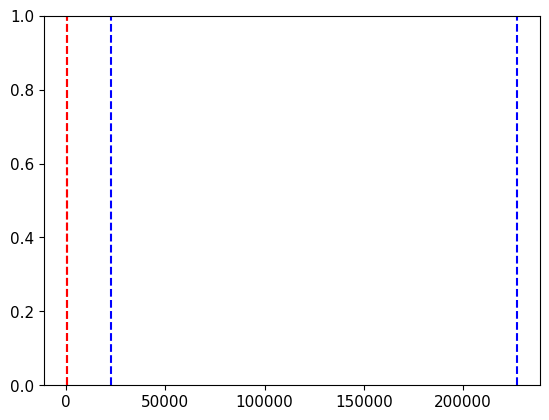

In [10]:
# test to see if code runs with one question
image = "vraag 2.jpeg"
prompt, response, car_speed, df, location, weather = run_program(image)

In [11]:
response

'B\n\nReasoning:\nBased on the given context, there are no immediate hazards or obstacles that require braking. However, there are pedestrians and bicyclists in close proximity, which require the driver to reduce speed and exercise caution. Letting go of the accelerator is the appropriate response in this situation, as it allows the driver to maintain control of the vehicle while reducing speed and being prepared to react to any unexpected situations. Additionally, the driver should be aware of the "Bicycle lane" traffic sign and give priority to any bicyclists on the road.'

In [3]:
# load in ground truth data
truth = pd.read_csv("ground-truth/ground-truth-validation.csv")
results = truth.copy(deep = True)
results["Answer(word)"] = None
results["Answer(letter)"] = None
results["Speed"] = None
results.insert(4, "Location", "", True)
results.insert(5, "Weather", "", True)

In [4]:
# loop over all images, capture output to not clutter notebook
for row in range(len(truth.index)):
    tru_row = truth.loc[row]
    res_row = results.loc[row]

    image = tru_row["Filename"]
    prompt, response, car_speed, df, location, weather = run_program(image)
    resp_char = response.strip(' \n\t')[0]

    if resp_char == 'A':
        resp_word = "Brake"
    elif resp_char == 'B':
        resp_word = "Release Accelerator"
    elif resp_char == 'C':
        resp_word = "Nothing"
    else:
        resp_word = "unknown"

    res_row["Answer(letter)"] = resp_char
    res_row["Speed"] = car_speed
    res_row["Location"] = location
    res_row["Weather"] = weather
    res_row["Answer(word)"] = resp_word

UsageError: Line magic function `%%capture` not found.


In [20]:
len(os.listdir("images"))

3

In [ ]:
confu = metrics.confusion_matrix(truth[["Answer(letter)"]], results[["Answer(letter)"]])
score = metrics.accuracy_score(truth[["Answer(letter)"]], results[["Answer(letter)"]])


0.36363636363636365


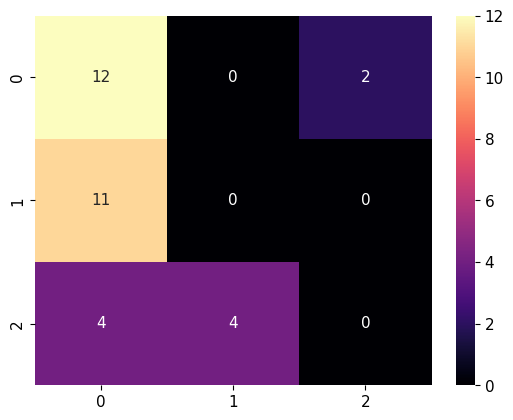

In [ ]:
sns.heatmap(confu, annot=True, cmap='magma')
print(score)
plt.show()

In [12]:
df_speed_dif = results[["Speed"]].replace('unknown', 0).astype(float) - truth[["Speed"]].astype(float)
accuracy = len(df_speed_dif[df_speed_dif['Speed'] != 0])/len(truth)
print((1-accuracy))

0.9393939393939394


In [16]:
from datetime import datetime
import os
from matplotlib import pyplot as plt
import shutil
import pandas as pd
import numpy as np

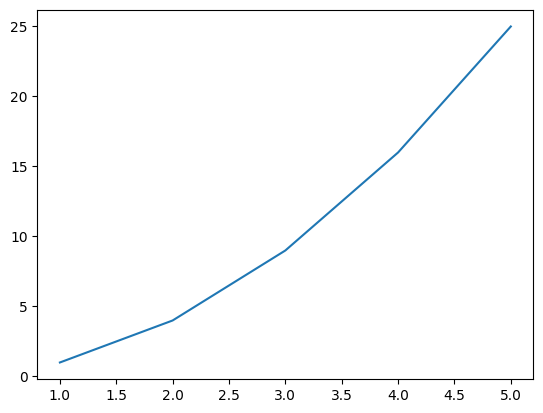

In [12]:
results = pd.DataFrame()
df = pd.DataFrame()
prompt = "hi"
response = "yo"
arr = np.array([1, 2, 3, 4, 5])

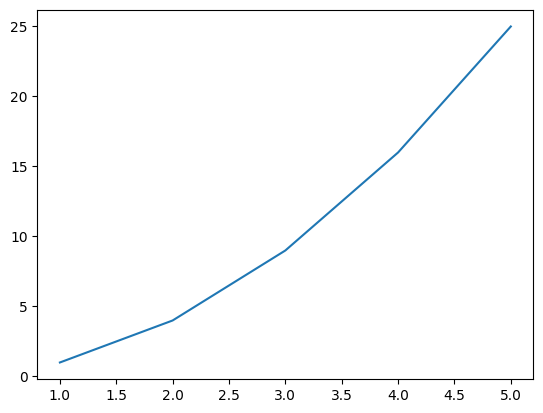

In [19]:
questions = ["vraag 1", "vraag 2", "vraag 3"]


############ RUN ONCE AT BEGINNING ##################
results_dir = datetime.now().strftime("%Y-%m-%d[%H.%M.%S]")
results_dir = os.path.join("results", results_dir)

subdirs = ["crops", "tri-crop", "df", "texts"]

for name in subdirs:
    subdirectory_path = os.path.join(results_dir, name)
    os.makedirs(subdirectory_path)


##########################################


############# Loop per question #############
for question_name in questions:
    df.to_csv(os.path.join(results_dir, f"df/{question_name}.csv"))

    shutil.copytree("tri-crop/predict/crops", f"{results_dir}/tri-crop/" + question_name)
    shutil.copytree("Crops", f"{results_dir}/crops/" + question_name)
    
    with open(os.path.join(results_dir, f'texts/{question_name}.txt'), 'w') as file:
        file.write(prompt)
        file.write("\n")
        file.write(response)

############ RUN ONCE AT END ############
# write some general information about run
with open(os.path.join(results_dir, 'info.txt'), "w") as file:
    file.write("Model: ")
    file.write("\n")
    file.write("Accuracy: ")
    file.write("\n")
    file.write("Runtime: ")
    file.write("\n")

plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
np.save(os.path.join(results_dir, 'confusion'), arr)
plt.savefig(os.path.join(results_dir, 'confusion.png'))

results.to_csv(os.path.join(results_dir, "results.csv"))

'results/2023-06-02/tri-crop/vraag z'

In [ ]:
cwd = os.path.getcwd()

current_date = datetime.datetime.now()

os.path.join(cwd,'results')

In [12]:
results

,Filename,Answer(letter),Answer(word),Speed,Location,Weather,Prompt
0,Vraag 1.jpeg,None,None,None,,,
1,Vraag 2.jpeg,None,None,None,,,
2,Vraag 3.jpeg,None,None,None,,,
3,Vraag 4.jpeg,None,None,None,,,
4,Vraag 5.jpeg,None,None,None,,,
5,Vraag 6.jpeg,None,None,None,,,
6,Vraag 7.jpeg,None,None,None,,,
7,Vraag 8.jpeg,None,None,None,,,
8,Vraag 9.jpeg,None,None,None,,,
9,Vraag 10.jpeg,None,None,None,,,


In [9]:
results.to_csv("results-gpt-3.5-2.csv")

In [ ]:
df_adjusted = pd.read_csv("results-gpt-3.5-adjusted.csv")
df_adjusted.head()

In [ ]:
df_run_1 = pd.read_csv("results-gpt-3.5.csv")
df_run_2 = pd.read_csv("results-gpt-3.5-2.csv")
df_merged = pd.merge(df_run_1, df_run_2)
df_merged = df_merged.drop_duplicates(keep=False)
df_merged

In [ ]:
#TODO implement asynchronous API call

def make_api_call(prompt):
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        temperature=0,
        stop=None,
        max_tokens=1024,
        n=1,
        messages=[
            {
                "role": "system",
                "content": "You are ChatGPT, a large language model trained by OpenAI. You are taking the dutch driving exam and wil be presented with what you see around you. Answer as concisely as possible and only take the dutch traffic rules in to consideration.",
            },
            {"role": "user", "content": prompt},
        ],
    )
    response = completion["choices"][0]["message"]["content"].strip()
    return response

for row in range(len(truth.index)):
    tru_row = truth.loc[row]
    res_row = results.loc[row]

    image = tru_row["Filename"]
    prompt, car_speed = run_program(image)
    res_row["Speed"] = car_speed
    res_row["Prompt"] = prompt

    # Create a ThreadPoolExecutor for concurrent API calls
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Submit the API calls as asynchronous tasks
        api_calls = executor.submit(make_api_call, prompt)
    

# Retrieve the results as they become available
for row, future in enumerate(concurrent.futures.as_completed(api_calls)):
    generated_text = future.result()
    results.loc[row, "Answer(word)"] = generated_text

# resp_char = response.strip(' \n\t')[0]

# if resp_char == 'A':
#     resp_word = "Brake"
# elif resp_char == 'B':
#     resp_word = "Release Accelerator"
# elif resp_char == 'C':
#     resp_word = "Nothing"
# else:
#     resp_word = "unknown"

# res_row["Answer(letter)"] = resp_char
# res_row["Speed"] = car_speed
# res_row["Answer(word)"] = resp_word